In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
def plot_correlation_map(val):
    corr=val.corr()
    _,ax=plt.subplots(figsize=(8,8))
    cmap=sns.diverging_palette(220,10,as_cmap=True)                  
    _=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={"shrink":0.8},ax=ax,annot=True,annot_kws={"fontsize":12})
    ax.set_ylim(+4,-0.1)

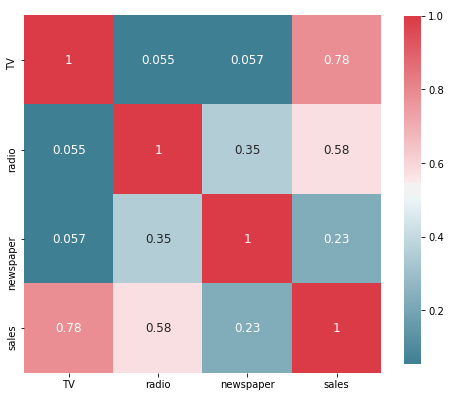

In [7]:
plot_correlation_map(df)

In [8]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16,8))
    plt.scatter(
        df[feature],
        df[target],
        c='black'
    )
    plt.xlabel("Monet spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

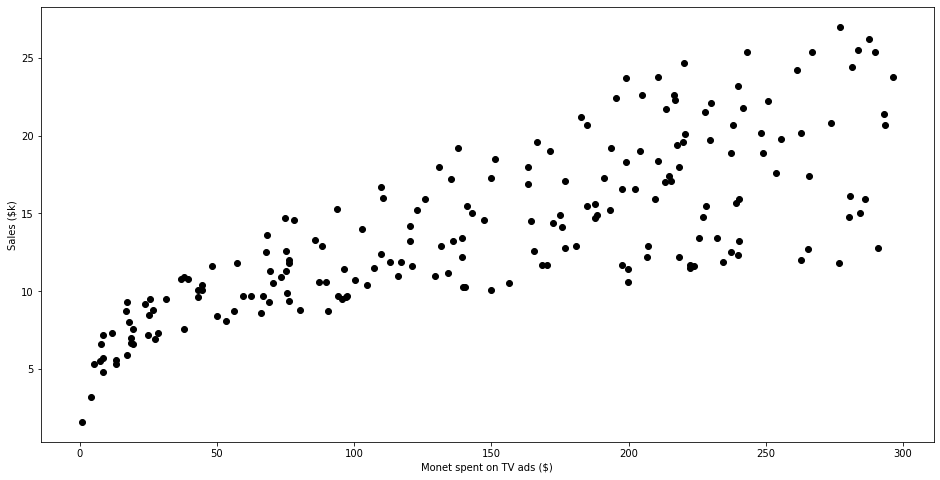

In [9]:
scatter_plot('TV', 'sales')

In [10]:
df.round({'sales': 0})

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.0
1,44.5,39.3,45.1,10.0
2,17.2,45.9,69.3,9.0
3,151.5,41.3,58.5,18.0
4,180.8,10.8,58.4,13.0
...,...,...,...,...
195,38.2,3.7,13.8,8.0
196,94.2,4.9,8.1,10.0
197,177.0,9.3,6.4,13.0
198,283.6,42.0,66.2,26.0


In [11]:
X = df.iloc[:,[0]].values
y = df.iloc[:,[-1]].values


In [12]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/3, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, y_Train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
Y_Pred = regressor.predict(X_Test)

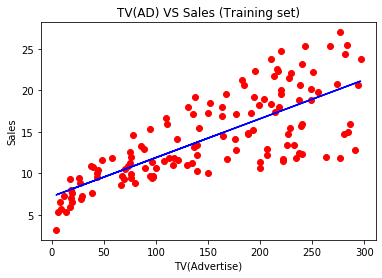

In [15]:
plt.scatter(X_Train, y_Train, color = 'red')
plt.plot(X_Train,regressor.predict(X_Train), color = 'blue')
plt.title('TV(AD) VS Sales (Training set)')
plt.xlabel('TV(Advertise)')
plt.ylabel('Sales')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

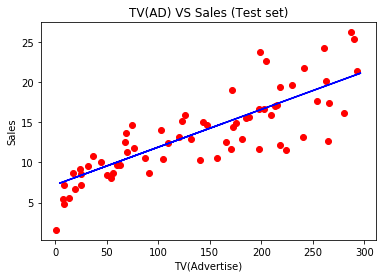

In [16]:
plt.scatter(X_Test, y_Test, color = 'red')
plt.plot(X_Train,regressor.predict(X_Train), color = 'blue')
plt.title('TV(AD) VS Sales (Test set)')
plt.xlabel('TV(Advertise)')
plt.ylabel('Sales')
plt.plot

# Multiple linear regression - least squares fitting

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

-3.07294659710021


In [18]:
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(X_test)

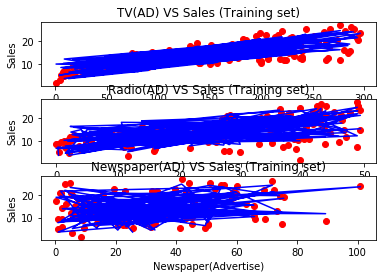

In [35]:
fig = plt.figure()


plt.subplot(3, 1, 1)
plt.scatter(X_train['TV'], y_train, color = 'red')
plt.plot(X_train['TV'],regressor.predict(X_train), color = 'blue')
plt.title('TV(AD) VS Sales (Training set)')
plt.xlabel('TV(Advertise)')
plt.ylabel('Sales')

plt.subplot(3, 1, 2)
plt.scatter(X_train['radio'], y_train, color = 'red')
plt.plot(X_train['radio'],regressor.predict(X_train), color = 'blue')
plt.title('Radio(AD) VS Sales (Training set)')
plt.xlabel('Radio(Advertise)')
plt.ylabel('Sales')

plt.subplot(3, 1, 3)
plt.scatter(X_train['newspaper'], y_train, color = 'red')
plt.plot(X_train['newspaper'],regressor.predict(X_train), color = 'blue')
plt.title('Newspaper(AD) VS Sales (Training set)')
plt.xlabel('Newspaper(Advertise)')
plt.ylabel('Sales')

plt.show()

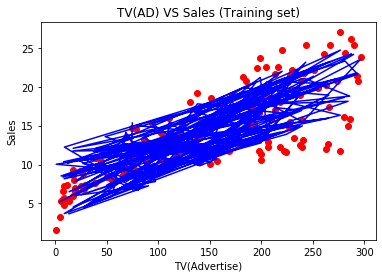

In [23]:
plt.scatter(X_train['TV'], y_train, color = 'red')
plt.plot(X_train['TV'],regressor.predict(X_train), color = 'blue')
plt.title('TV(AD) VS Sales (Training set)')
plt.xlabel('TV(Advertise)')
plt.ylabel('Sales')
plt.show()

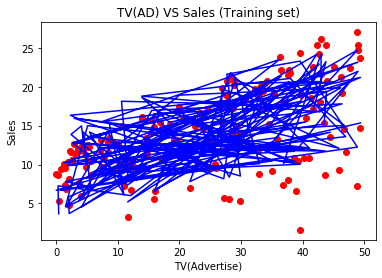

In [24]:
plt.scatter(X_train['radio'], y_train, color = 'red')
plt.plot(X_train['radio'],regressor.predict(X_train), color = 'blue')
plt.title('TV(AD) VS Sales (Training set)')
plt.xlabel('TV(Advertise)')
plt.ylabel('Sales')
plt.show()

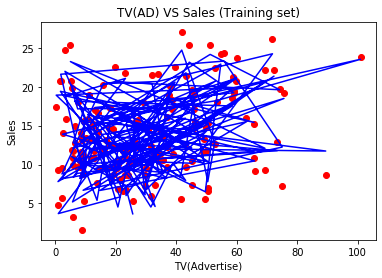

In [25]:
plt.scatter(X_train['newspaper'], y_train, color = 'red')
plt.plot(X_train['newspaper'],regressor.predict(X_train), color = 'blue')
plt.title('TV(AD) VS Sales (Training set)')
plt.xlabel('TV(Advertise)')
plt.ylabel('Sales')
plt.show()